Author: Hirwa Ishimwe

## About the Dataset
Dataset Source: https://www.kaggle.com/datasets/cedricaubin/linkedin-data-analyst-jobs-listings

Data collection:
LinkedIn was scraped for jobs listings using a python script to go through LinkedIn and collected all the necessary data. 3 locations were chosen: Africa, Canada, and the USA. 

In [507]:
#Import libraries
import pandas as pd
import seaborn as sns
import numpy as  np
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [508]:
#Import CSV into the Dataframe
usa = pd.read_csv("archive/linkedin-jobs-usa.csv")

## Exploratory Data Analysis

In [509]:
usa.head()

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
2,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Texas, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
3,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Illinois, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
4,Entry-Level Data Analyst,The Federal Savings Bank,"The Federal Savings Bank, a national bank and ...",onsite,NaN,"Chicago, IL","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-17,https://www.linkedin.com/jobs/view/entry-level...


In [510]:
usa['criteria'][0]

"[{'Seniority level': 'Not Applicable'}, {'Employment type': 'Full-time'}, {'Job function': 'Information Technology'}, {'Industries': 'Software Development, Technology, Information and Internet, and Financial Services'}]"

In [511]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2845 non-null   object
 1   company        2845 non-null   object
 2   description    2845 non-null   object
 3   onsite_remote  2845 non-null   object
 4   salary         929 non-null    object
 5   location       2845 non-null   object
 6   criteria       2845 non-null   object
 7   posted_date    2845 non-null   object
 8   link           2845 non-null   object
dtypes: object(9)
memory usage: 200.2+ KB


## Pre-processing and Cleaning

### Change the null values in the Salary Column to 0

In [512]:
#Set the dataframe Equal to the USA Table
df = usa
df['salary'] = df['salary'].fillna('0')

#Remove the non-numeric symbols from the salary values
df['salary'] = df['salary'].str.replace('$', '').str.replace(',', '')

#Convert the salary values to numeric format, turning the ranges into their average 
def convert(sal_str):
    if '-' in sal_str:
        low, high = sal_str.split('-')
        return (float(low) + float(high)) / 2
    else:
        return float(sal_str)

df['salary'] = df['salary'].apply(convert)

/var/folders/19/fcffy7zs3jlddkyks31njh5w0000gn/T/ipykernel_23217/2977525844.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['salary'] = df['salary'].str.replace('$', '').str.replace(',', '')


### Split the criteria column

In [513]:
#Convert the criteria column to json format, then converted to list
data = df.criteria.str.replace("'", '"').apply(json.loads).tolist()

#Create dataframe with 4 new features comes from criteria column 
temp_df = pd.DataFrame(data, columns=['Seniority_level', 'Employment_type','Job_function','Industries'])

#Get values for each row in a column, convert values to list and get the first items 
for col in temp_df.columns:
    temp_df[col] = [list(i.values())[0]  if i != None else i for i in temp_df[col] ]
    
#Merge the new dataframe with orginal dataframe
df = pd.merge(df, temp_df, left_index=True, right_index=True)

### Split the location column into city and state

In [514]:
#Split location by ',' and take last two item, then create new dataframe with two columns 'City', 'Country'
city_state = [ i.split(',')[-2:] for i in df.location]
city_state = pd.DataFrame(city_state, columns=['City', 'State'])

#merge new dataframe with orgine dataframe
df = pd.merge(df, city_state, left_index=True, right_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2845 non-null   object 
 1   company          2845 non-null   object 
 2   description      2845 non-null   object 
 3   onsite_remote    2845 non-null   object 
 4   salary           2845 non-null   float64
 5   location         2845 non-null   object 
 6   criteria         2845 non-null   object 
 7   posted_date      2845 non-null   object 
 8   link             2845 non-null   object 
 9   Seniority_level  2799 non-null   object 
 10  Employment_type  2653 non-null   object 
 11  Job_function     2653 non-null   object 
 12  Industries       2652 non-null   object 
 13  City             2845 non-null   object 
 14  State            1752 non-null   object 
dtypes: float64(1), object(14)
memory usage: 333.5+ KB


## Analysis

### Onsite_remote job distribution

Text(0, 0.5, 'Number Of Listings')

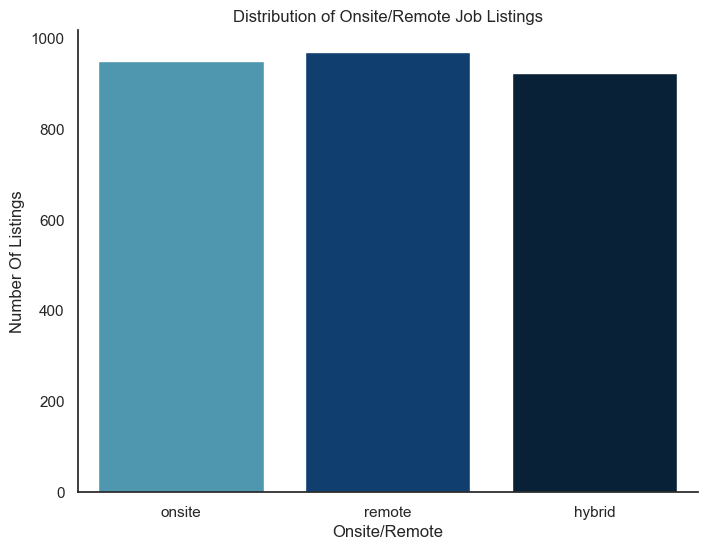

In [515]:
#Create a grapgh of the Distribution of Onsite/Remote Data analyst Job Listings on linkedin
plt.figure(figsize=(8,6))
sns.set(style="white")
sns.countplot(data=df, x='onsite_remote', palette='ocean_r')
sns.despine()
plt.title('Distribution of Onsite/Remote Job Listings')
plt.xlabel('Onsite/Remote')
plt.ylabel('Number Of Listings')

### Job listing distribution by State

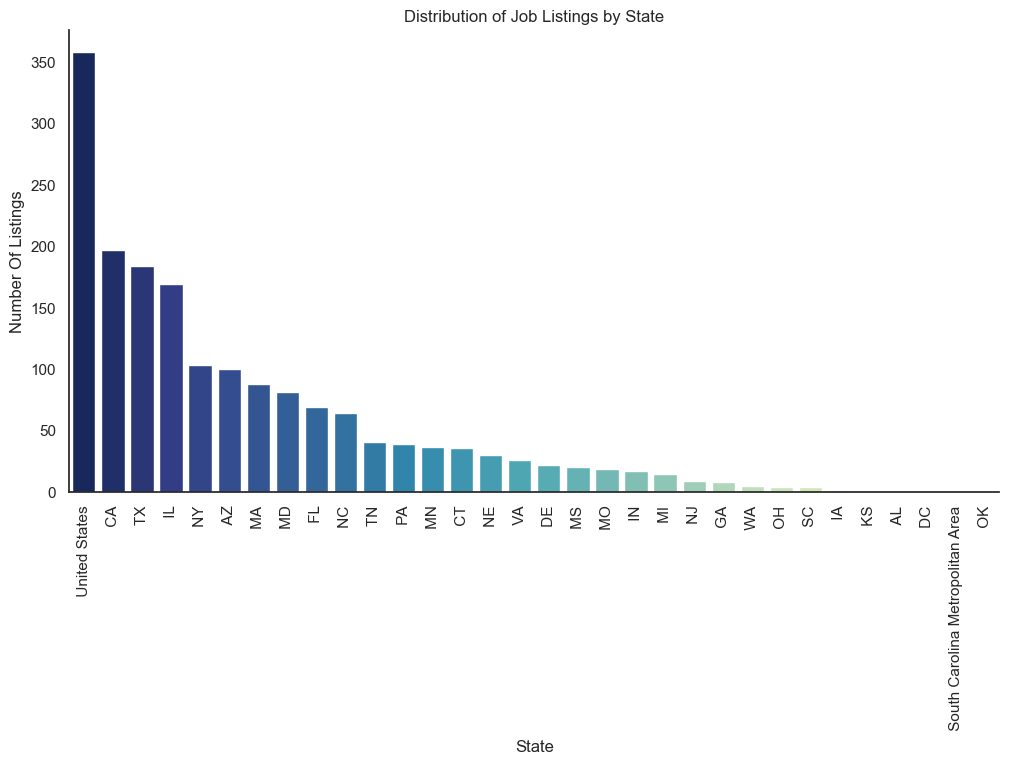

In [516]:
#Create a grapgh of the Distribution of Data analyst Job Listings on linkedin by state
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='State', palette = 'YlGnBu_r', order=df['State'].value_counts().index)
sns.despine()
plt.title('Distribution of Job Listings by State')
plt.xlabel('State')
plt.ylabel('Number Of Listings')
plt.xticks(rotation=90)
plt.show()

### Job listing Distribution by City

In [517]:
#Count the number of job listings in each city
job_counts_by_city = df['City'].value_counts()

#Show the job counts of the top 20 cities
job_counts_by_city[:20]

United States                                 632
New York City Metropolitan Area               179
Chicago                                       153
New York                                      139
Austin                                         72
Texas                                          67
Timonium                                       61
Dallas                                         55
Boston                                         54
Charlotte                                      41
Miami                                          40
Franklin                                       38
Tempe                                          38
Illinois                                       38
Indiana                                        37
Tennessee                                      37
Greater Scranton Area                          37
Greensboro--Winston-Salem--High Point Area     37
District of Columbia                           36
Denver Metropolitan Area                       36


### Top Employers on linkedin

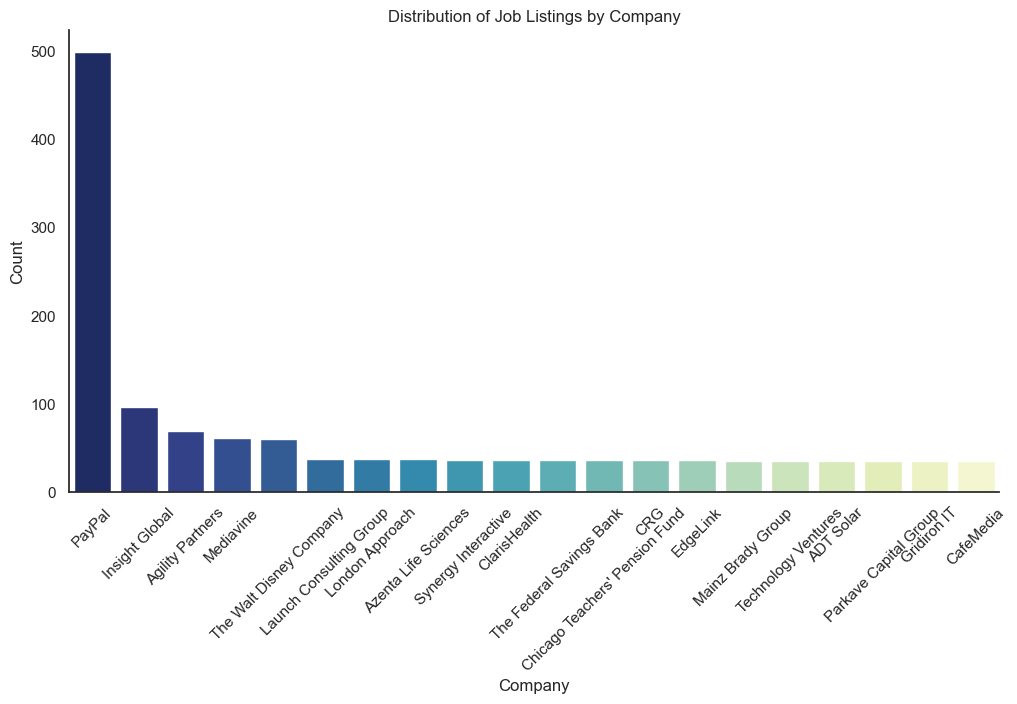

In [518]:
plt.figure(figsize=(12,6))

#Make a new dataframe with count of the company column
df_company = df.groupby(['company']).size().reset_index(name='counts')

#Filter out states with less than 20 listings
df_company = df_company[df_company['counts'] >= 20] # Filter out states with less than 20 listings

#Only show the top 20 states
df_company = df_company.sort_values(by=['counts'], ascending=False)[:20] 

#Plot
sns.barplot(data=df_company, x='company', y='counts', palette = 'YlGnBu_r')
sns.despine()
plt.title('Distribution of Job Listings by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Job Title counts
#### To see the most used titles in the Data analyst Job listings


In [519]:
#Get the value couts of the title column
job_titles = usa['title'].value_counts()

#Show the Top 15 row
job_titles[:15]

Data Analyst                           2110
Data Analyst - Recent Graduate          183
Junior Data Analyst                     139
Data Analyst - (Remote - US)             62
Entry-Level Data Analyst                 37
Associate Data Analyst                   37
SQL Data Analyst                         37
Analyst (Global Data and Analytics)      36
Analyst, Data and Analytics              36
Analyst - Data Visualization             35
Data Analyst I (entry level)             34
Data Analyst (SQL)                       25
Data Analytics Analyst                   21
Data Analyst - remote!                   10
Data Analyst, Money                       7
Name: title, dtype: int64

### Employement types

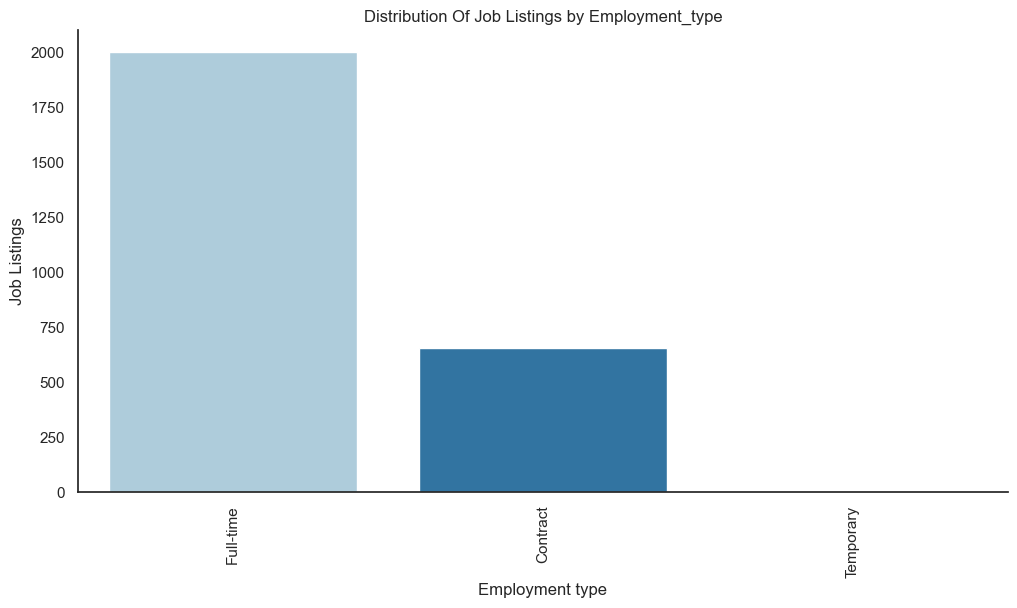

In [520]:
#Plot a grapgh of the Distribution of Data analyst Job Listings on linkedin by Employment type
df['Employment_type'].value_counts()
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Employment_type',palette="Paired")
sns.despine()
plt.title('Distribution Of Job Listings by Employment_type')
plt.xlabel('Employment type')
plt.ylabel('Job Listings')
plt.xticks(rotation=90)
plt.show()

### Experience / Seniority

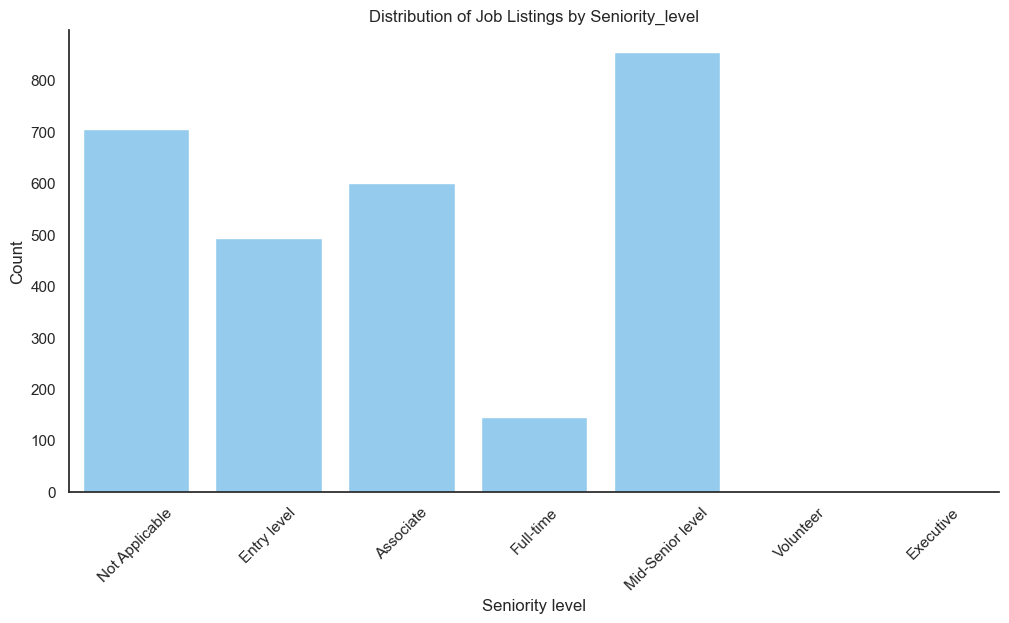

In [521]:
#Plot a grapgh of the Distribution of Data analyst Job Listings on linkedin by Seniority level
df['Seniority_level'].value_counts()
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Seniority_level', color='#87CEFA')
sns.despine()
plt.title('Distribution of Job Listings by Seniority_level')
plt.xlabel('Seniority level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Distribution of Salary

/var/folders/19/fcffy7zs3jlddkyks31njh5w0000gn/T/ipykernel_23217/553156292.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='salary', kde=True, element="step", stat="count", common_norm=False,palette="bright")


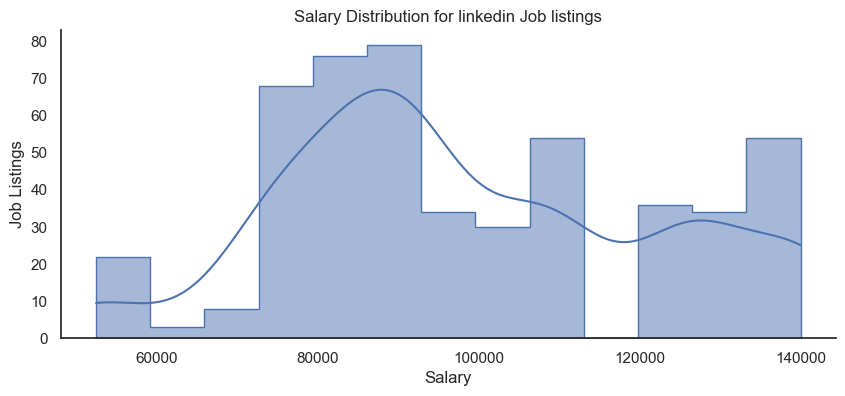

In [522]:
#Filter out Salaries less than $50,000
df = df[df['salary'] >= 50000]

#Create and set the plot
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='salary', kde=True, element="step", stat="count", common_norm=False,palette="bright")
sns.despine()
plt.title("Salary Distribution for linkedin Job listings")
plt.xlabel("Salary")
plt.ylabel("Job Listings")

#Show the plot
plt.show()

### Salary distribution based onsite_remote
#### To examin salary distribution differences between onsite, remote and hybrid jobs

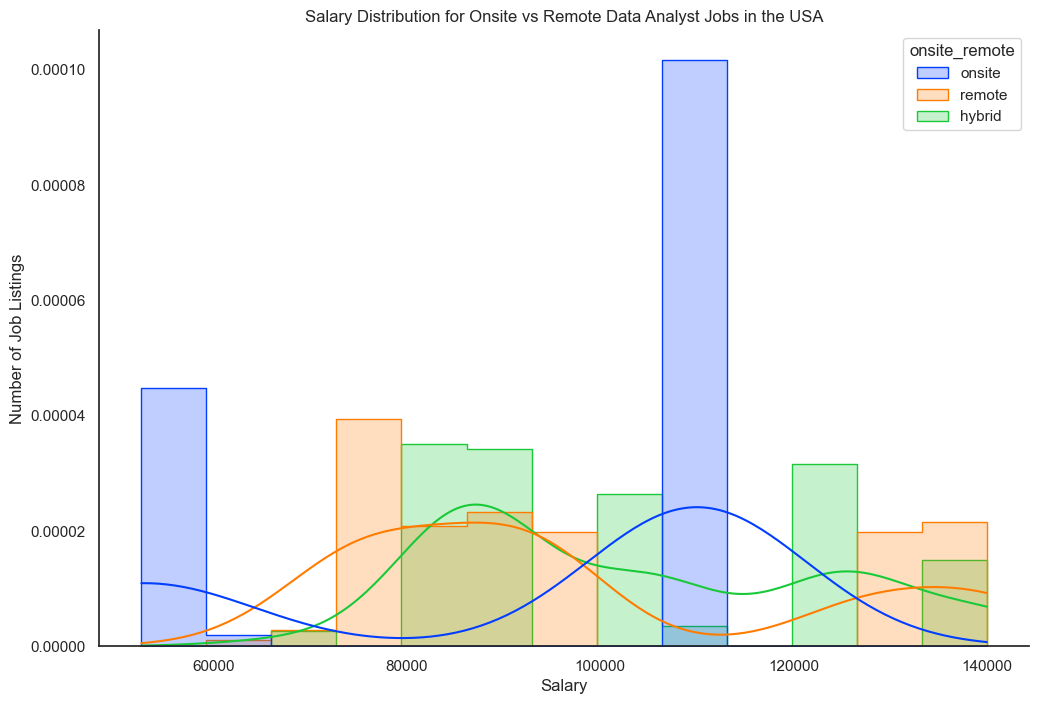

In [523]:
#Create a distribution plot of salary based on onsite_remote
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='salary', hue='onsite_remote', kde=True, element="step", stat="density", common_norm=False,palette="bright")
sns.despine()
plt.title("Salary Distribution for Onsite vs Remote Data Analyst Jobs in the USA")
plt.xlabel("Salary")
plt.ylabel("Number of Job Listings")
plt.show()

### Average salary of each Company

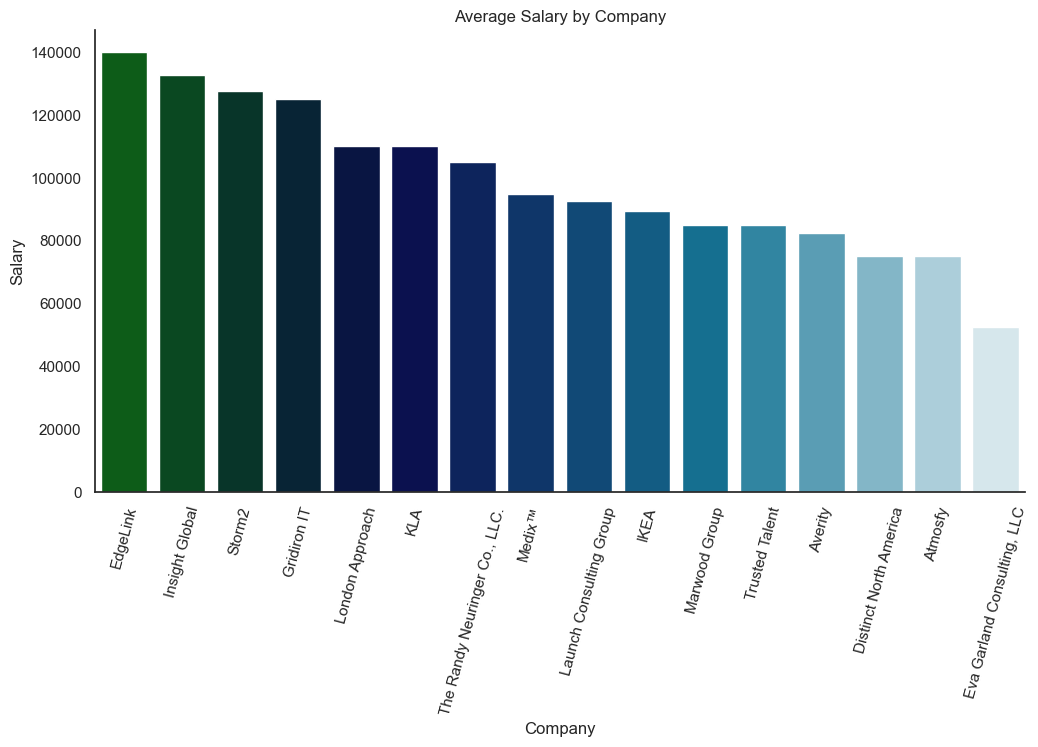

In [524]:
#Group the DataFrame by company and compute the mean for salary within each group
salary_by_company = df.groupby('company')['salary'].agg(['mean', 'count']).round({'mean': 2}).sort_values(by='mean', ascending=False)
salary_by_company = salary_by_company[salary_by_company['count'] > 10]

#Create and set the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=salary_by_company.index, y='mean', data=salary_by_company, palette='ocean')
sns.despine()
plt.title('Average Salary by Company')
plt.xlabel('Company')
plt.ylabel('Salary')
plt.xticks(rotation=75)

# Display the plot
plt.show()

### Industry counts
#### To see the most frequent industries in the Data analyst Job listings


In [525]:
industries = df['Industries'].value_counts()
industries[:15]

IT Services and IT Consulting and Software Development                                                             72
Hospitals and Health Care                                                                                          38
Staffing and Recruiting                                                                                            37
Retail                                                                                                             35
IT Services and IT Consulting and Hospitals and Health Care                                                        34
Market Research                                                                                                    34
IT Services and IT Consulting, Banking, and Financial Services                                                     33
Advertising Services and Online Audio and Video Media                                                              33
Insurance and Investment Management                     

## Linear Regression
#### To examine how well this model can predict the salary based on other features of a job listing

In [526]:
#Select the relevant columns for the regression analysis
reg_df = df[['company','onsite_remote', 'Seniority_level', 'City','State' ,'Employment_type', 'Job_function', 'Industries', 'salary']]

#Get dummy variables for the categorical variables
reg_df = pd.get_dummies(reg_df, columns=['company','onsite_remote', 'Seniority_level', 'City','State' , 'Employment_type', 'Job_function', 'Industries'], drop_first=True)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_df.drop('salary', axis=1), reg_df['salary'], test_size=0.3)

#Fit the linear regression model to the training data
regression_model = LinearRegression().fit(X_train, y_train)

#Use the model to make predictions on the test data
y_pred = regression_model.predict(X_test)

#Evaluate the performance of the model using mean squared error and R-squared
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('R-squared: ', r2_score(y_test, y_pred))

Mean squared error:  3430656.784715205
R-squared:  0.9944458910000685
